#### **1. Download the wikipedia page content**

In [1]:
import requests

def fetch_wikipedia_content(title):
    """
    Fetch plain text content of a Wikipedia page using the Wikipedia API.
    Args: title (str): The title of the Wikipedia page.
    Returns:  str: The plain text content of the page, or an error message if not found.
    """
    params = {
        'action': 'query', # Specifies the type of action (query for data).
        'format': 'json', # Requests the response in JSON format.
        'prop': 'extracts', # Indicates the desire to retrieve plain text extracts.
        'explaintext': True, # Requests plain text without HTML tags.
        'titles': title # The title of the page to fetch.
    }

    # Send a GET request to the Wikipedia API
    response = requests.get('https://en.wikipedia.org/w/api.php', params=params).json()

    # Parse the result
    page = next(iter(response['query']['pages'].values()))

    # Extract and return the page content
    if 'extract' in page.keys():
        return page['extract']
    else:
        return "Page not found"


In [4]:
title = "AbbVie"  # The title of the Wikipedia page to fetch
content = fetch_wikipedia_content(title)
print(content)

AbbVie Inc. is an American pharmaceutical company headquartered in North Chicago, Illinois. It is ranked sixth on the list of largest biomedical companies by revenue. In 2023, the company's seat in Forbes Global 2000 was 74, and rank 89 on the 2024 list. The company's primary product is Humira (adalimumab) ($14 billion in 2023 revenues, 27 percent of total), administered via injection. It is approved to treat autoimmune diseases including rheumatoid arthritis, Crohn's disease, plaque psoriasis, and ulcerative colitis.
It developed Skyrizi ($7.8 billion in 2023 revenues), an interleukin-23 (IL-23) inhibitor also used to treat autoimmune diseases. Its other major products include Botox ($5.7 billion in 2023 revenues), Imbruvica to treat cancer ($3.6 billion in 2023 revenues), Rinvoq to treat arthritis ($4 billion in 2023 revenues), Venclexta to treat leukemia and lymphoma ($2.3 billion in 2023 revenues), Vraylar to treat schizophrenia and bipolar disorder ($2.7 billion in 2023 revenues),

#### **2. Apply the Word Cloud**

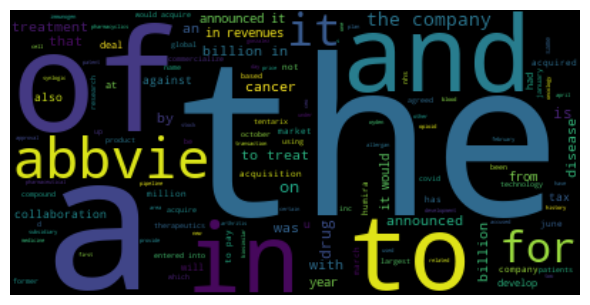

In [52]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Instantiate / create a new wordcloud.
wordcloud = WordCloud(
    stopwords=[] # If None, the build-in STOPWORDS list will be used.
)

# Apply the wordcloud to the text.
wordcloud.generate(content.lower())

# create a figure

fig, ax = plt.subplots(1,1, figsize = (6,4))

# add interpolation = bilinear to smooth things out
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout()
plt.savefig("word-cloud1.png", facecolor='k', bbox_inches='tight')

#### **3. Removing Stopwords**

In [57]:
from wordcloud import STOPWORDS

# Display the stopwords
print(STOPWORDS)

{'shall', 'and', 'do', 'him', 'between', 'all', 'like', 'some', 'http', 'if', "they'd", "you've", 'itself', 'yourselves', 'over', 'while', 'who', 'be', "you're", 'once', "she'll", 'yourself', 'not', 'other', 'ours', 'to', 'any', 'k', "don't", "hadn't", "aren't", "we've", "won't", 'but', 'about', 'are', 'very', "weren't", 'this', 'was', 'with', 'is', 'it', 'what', 'before', 'ourselves', 'they', "we'd", 'in', "i've", 'herself', 'cannot', 'also', 'theirs', 'by', 'both', 'ever', 'having', 'have', "that's", 'a', 'them', 'he', 'for', "didn't", 'your', 'can', 'more', 'because', 'into', 'his', 'nor', "how's", 'whom', "isn't", "who's", 'been', "we'll", "mustn't", 'why', 'since', "they're", 'as', 'com', 'else', 'however', 'i', "it's", 'same', "wasn't", 'which', 'myself', 'after', 'were', "couldn't", 'against', 'only', "we're", 'should', 'therefore', "they've", 'at', 'has', 'own', 'few', 'down', 'here', 'just', 'the', 'there', 'until', 'get', 'we', 'had', 'from', 'www', 'did', 'r', 'below', 'on',

In [61]:
from collections import Counter
from wordcloud import STOPWORDS
import re

# Preprocess text: Remove punctuation and make lowercase
processed_text = re.sub(r'[^\w\s]', '', content).lower()

words = processed_text.split() # Split text into words

word_freq_before = Counter(words) # Before removing stopwords

# Remove stopwords
filtered_words = [word for word in words if word not in STOPWORDS]

word_freq_after = Counter(filtered_words) # After removing stopwords

print("Word Frequencies Before Removing Stopwords:\n", word_freq_before.most_common(10))
print("\nWord Frequencies After Removing Stopwords:\n", word_freq_after.most_common(10))

Word Frequencies Before Removing Stopwords:
 [('the', 98), ('to', 66), ('in', 63), ('of', 55), ('and', 55), ('a', 42), ('abbvie', 41), ('company', 26), ('for', 25), ('it', 22)]

Word Frequencies After Removing Stopwords:
 [('abbvie', 41), ('company', 26), ('billion', 21), ('announced', 18), ('drug', 16), ('2023', 12), ('treat', 9), ('revenues', 8), ('acquire', 8), ('2024', 7)]


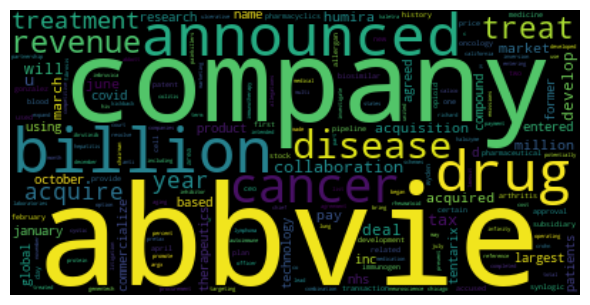

In [63]:
# Instantiate / create a new wordcloud.
wordcloud = WordCloud(
    stopwords=STOPWORDS
)

# Apply the wordcloud to the text.
wordcloud.generate(content.lower())

# create a figure

fig, ax = plt.subplots(1,1, figsize = (6,4))

# add interpolation = bilinear to smooth things out
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout()
plt.savefig("word-cloud2.png", facecolor='k', bbox_inches='tight')